In [22]:
# Import our libraries 
# Pandas and numpy for data wrangling
import pandas as pd

# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib as plt

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [3]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


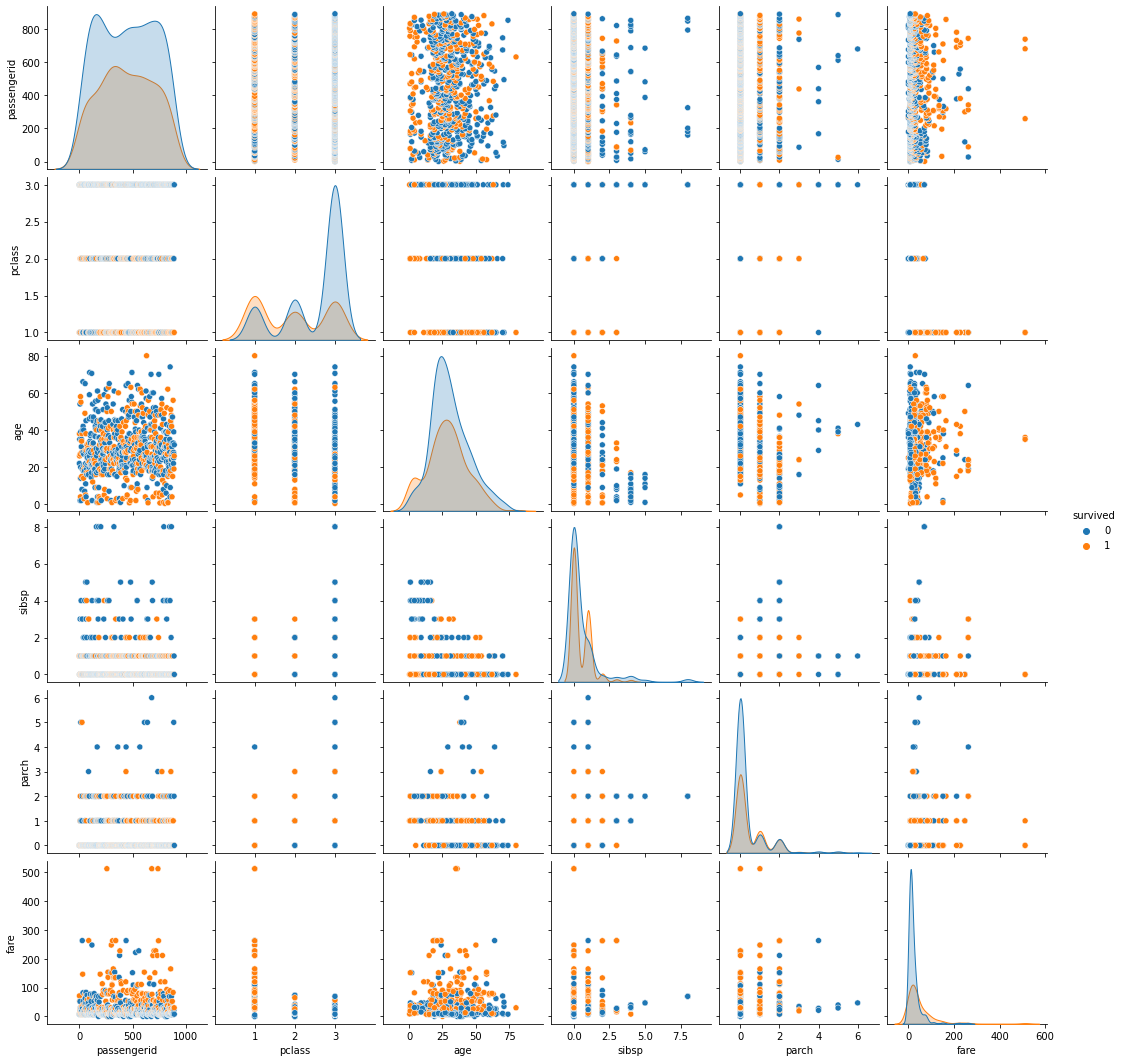

In [4]:
# Visualize all the data using sns.pairplot
sns.pairplot(data=df, hue='survived')

In [5]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

cabin          687
age            177
embarked         2
passengerid      0
survived         0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [6]:
# Fill age null values with -999
df['age'] = df.age.fillna(-999)
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [7]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)

In [8]:
df.columns

Index(['passengerid', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [9]:
# 2. Create a list of the features we are going to use.
selected_features = ['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3']

In [10]:
# Define our `X` and `y`
X = df[selected_features]
y = df['survived']

In [11]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.80, random_state=20)
print('Lenghth of our Training data:', len(X_train), '\nLength of our Testing data:', len(X_test))

Lenghth of our Training data: 712 
Length of our Testing data: 179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [12]:
# For our first pass, initialize our model with `max_depth=2`.
model = DecisionTreeClassifier(criterion='gini', max_depth=2)
model

DecisionTreeClassifier(max_depth=2)

In [13]:
# Fit our model with our training data. 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
# Make predictions of our testing data. 
pred = model.predict(X_test)

In [15]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.787709
Precision Score: 0.939394
Recall Score: 0.462687
F1 Score: 0.620000
AUC Score: 0.834222


# OPTIONAL:  Visualize your decision tree. 
* If you get an error, you may need to install the graphviz library.
* Run this command in your terminal to install the graphviz library. 
    * `conda install python-graphviz`
* If that does not work, then try installing the library using pip. 
    * `pip install graphviz`

* If neither of those work, you can just skip this step.

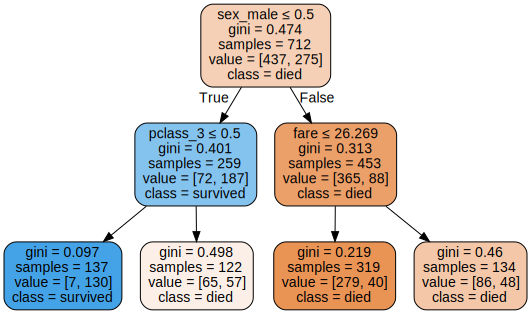

In [16]:
# OPTIONAL 
# Visualize your decision tree. 

dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [17]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from 
#sklearn.model_selection import GridSearchCV

params = { 
    'criterion': ['gini', "entropy", "log_loss"],
    'max_depth': [5,21,77],
    'min_samples_split': [30,50,100]
}

In [18]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV(
    estimator= DecisionTreeClassifier(),
    param_grid= params,
    scoring='f1'
)

In [19]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 21, 77],
                         'min_samples_split': [30, 50, 100]},
             scoring='f1')

In [20]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 30}


In [21]:
#best tree
print(grid_search_cv.best_estimator_)
model = grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_split=30)


In [22]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.804469
Precision Score: 0.775862
Recall Score: 0.671642
F1 Score: 0.720000
AUC Score: 0.812567


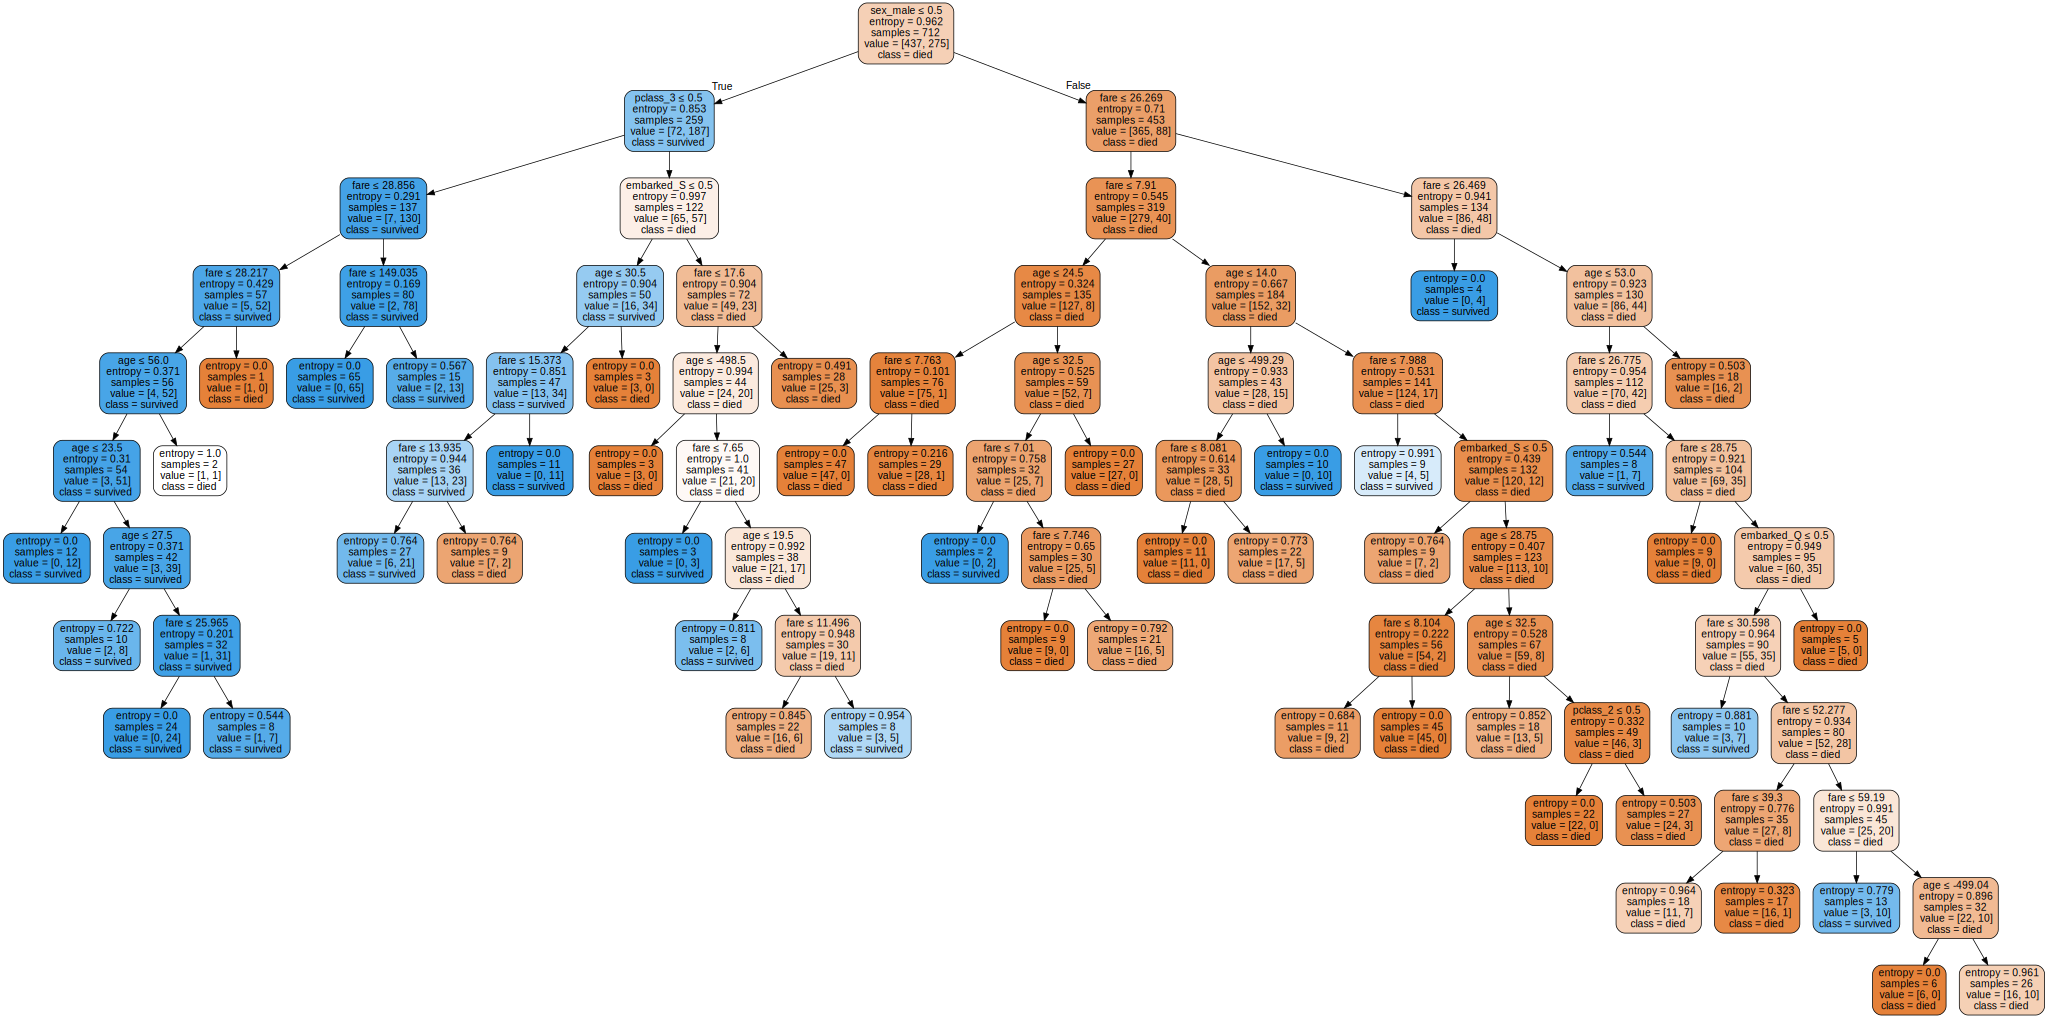

In [23]:
# OPTIONAL!

# 1. Visualize your best tree
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [24]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.342064,sex_male
1,0.305365,fare
0,0.165613,age
6,0.142422,pclass_3
4,0.029840,embarked_S
3,0.008232,embarked_Q
5,0.006464,pclass_2


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [25]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators' : [5, 10, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 6]
}

In [26]:
# 1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(), 
    param_grid=params,
    scoring='f1', )

In [27]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train);

In [28]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 6, 'min_samples_split': 10, 'n_estimators': 50}


In [29]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.815642
Precision Score: 0.826923
Recall Score: 0.641791
F1 Score: 0.722689
AUC Score: 0.847481


In [30]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

fare          0.318837
sex_male      0.275016
age           0.224738
pclass_3      0.119826
embarked_S    0.030574
pclass_2      0.024334
embarked_Q    0.006675
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [40]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [41]:
#duplicates 
df.duplicated().sum()



33

In [42]:
# drop duplicates and check again

df.drop_duplicates(inplace=True)
df.duplicated().sum()



0

In [43]:
df.isnull().sum()

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

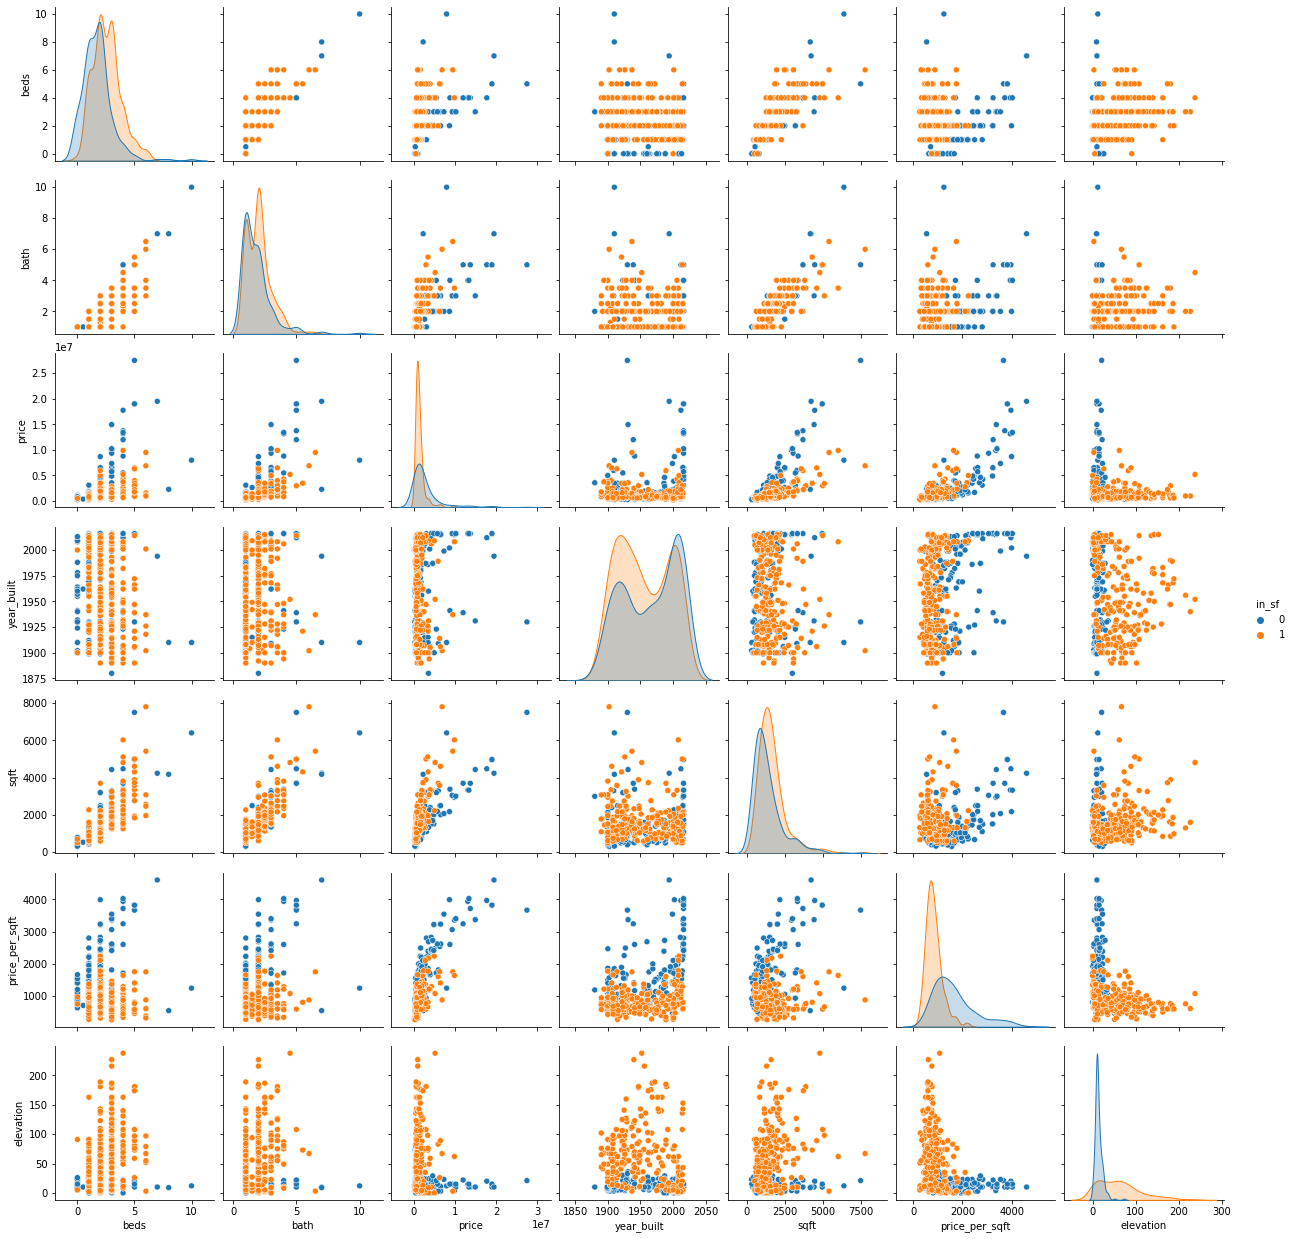

In [44]:
# quick pairplot
sns.pairplot(df, hue='in_sf');

In [45]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 

selected_features = ['price', 'sqft', 'price_per_sqft', 'elevation', 'year_built', 'beds']
X = df[selected_features]
y = df['in_sf']



In [46]:
# training split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Length of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Length of our Training data: (367, 6) 
Length of our Testing data: (92, 6)


In [53]:
# choosing params for random forest grid search
params = {
    'n_estimators' : [5, 10, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 7]
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(), 
    param_grid=params,
    scoring='accuracy', )



In [54]:
# finding the best parameters

grid_search_cv.fit(X_train, y_train);
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 50}


In [55]:
# model optimized for highest f1 score
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)



Accuracy Score: 0.913043
Precision Score: 0.937500
Recall Score: 0.900000
F1 Score: 0.918367
AUC Score: 0.963810


In [56]:
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

elevation         0.485914
price_per_sqft    0.212522
year_built        0.144099
sqft              0.093950
price             0.048801
beds              0.014715
dtype: float64

# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [23]:
df = pd.read_csv('data/adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


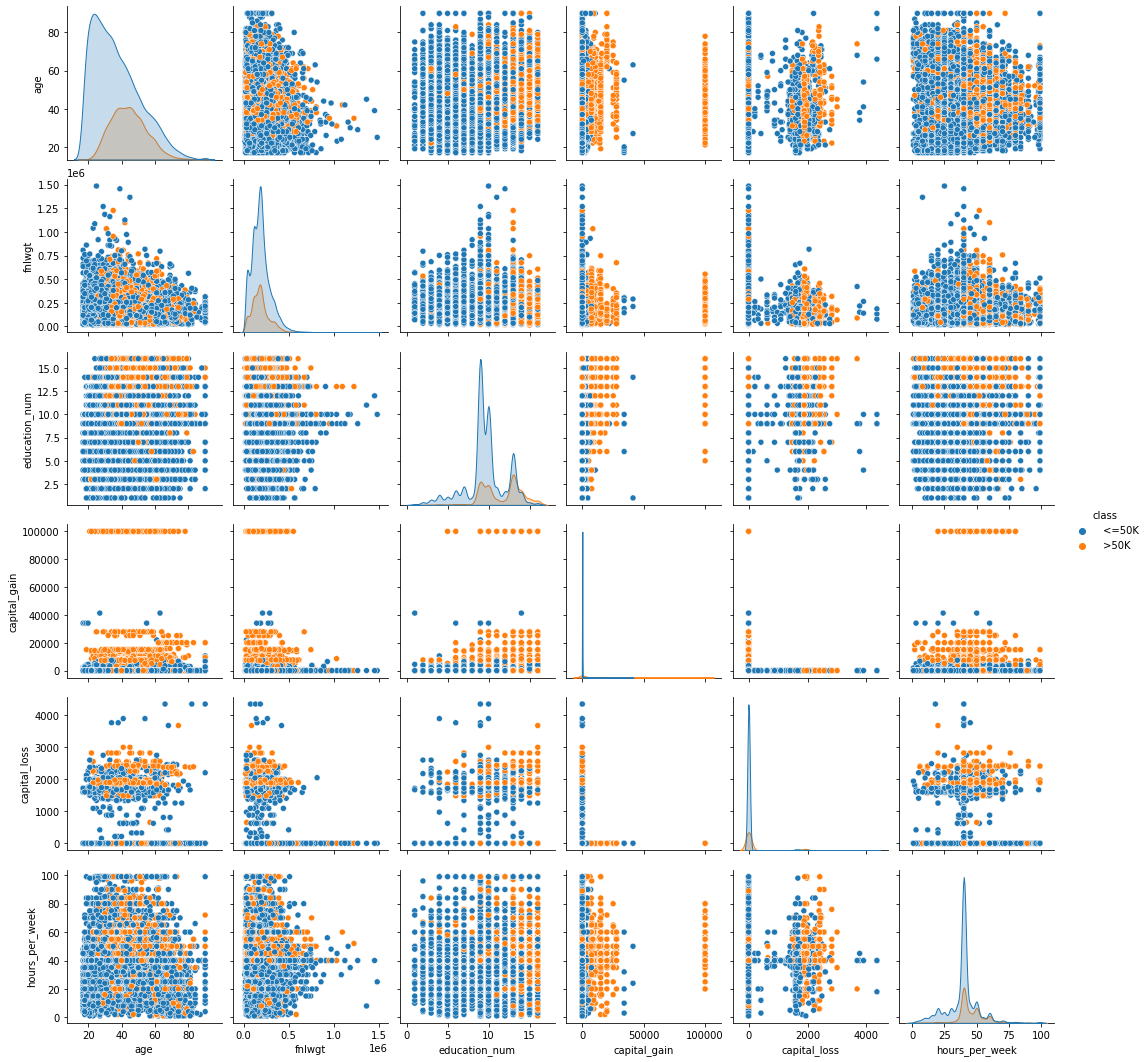

In [62]:
sns.pairplot(data=df, hue='class')

In [24]:
selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

X = df[selected_features]
y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Lenght of our Training data: (19536, 5) 
Length of our Testing data: (13025, 5)


In [27]:
params = {
    'n_estimators' : [5, 10,50],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 5]
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(), 
    param_grid=params,
    scoring='accuracy',)


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)


# Print the best parameters it found
print(grid_search_cv.best_params_)


# This command gives you model that has the highest f1-score. 
model = grid_search_cv.best_estimator_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, pos_label=' <=50K')
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label=' <=50K')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label=' <=50K')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=' <=50K')
print('F1 Score: %f' % f1)

In [9]:
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

capital_gain      0.362107
age               0.323065
capital_loss      0.147849
hours_per_week    0.119245
fnlwgt            0.047734
dtype: float64